# 情况1：有1个个体内因素和两个个体间因素

In [56]:
library(tidyverse)
library(ggpubr)
library(rstatix)

In [57]:
# 举例： 我们想了解性别(男、女)和压力（高、中、低）与成绩的关系，
#我们重复测量的两次（测试前，测试后）

data("performance", package = "datarium")
performance %>% sample_n_by(gender, stress, size = 1)

id,gender,stress,t1,t2
<int>,<fct>,<fct>,<dbl>,<dbl>
3,male,low,5.625011,5.471414
13,male,moderate,5.580000,5.528082
30,male,high,5.380364,5.827769
32,female,low,5.768068,5.908012
46,female,moderate,5.703230,5.916776
55,female,high,5.273704,5.245224


In [58]:
#宽数据转化为长数据
performance <- performance %>%
  gather(key = "time", value = "score", t1, t2) %>%
  convert_as_factor(id, time)

In [59]:
head(performance)

id,gender,stress,time,score
<fct>,<fct>,<fct>,<fct>,<dbl>
1,male,low,t1,5.964417
2,male,low,t1,5.506574
3,male,low,t1,5.625011
4,male,low,t1,5.710243
5,male,low,t1,5.736350
6,male,low,t1,5.616418


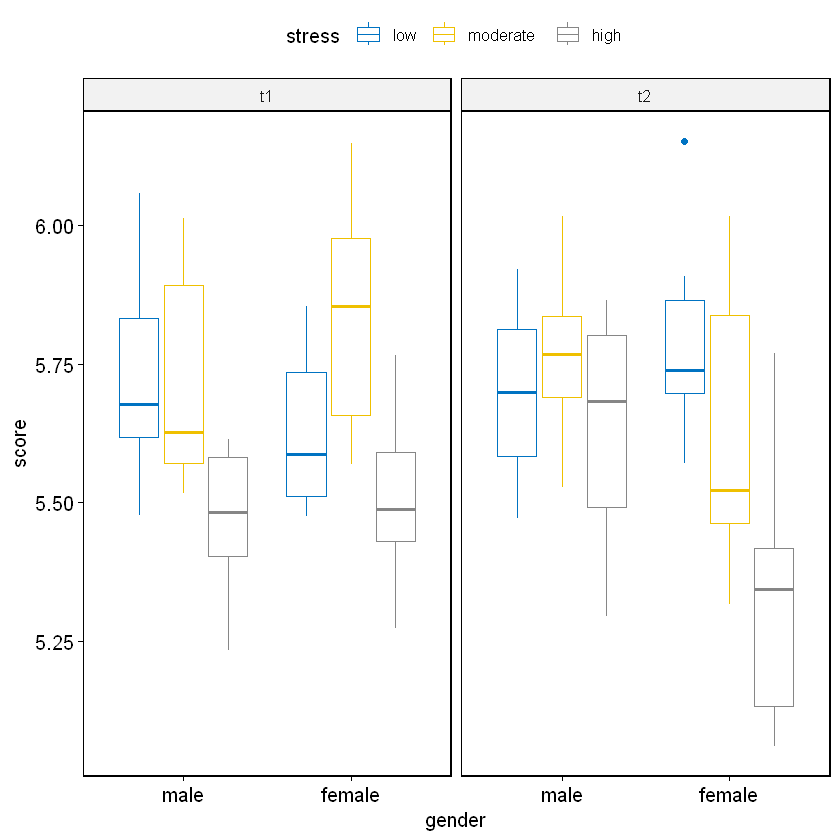

In [60]:
ggboxplot(
  performance, x = "gender", y = "score",
  color = "stress", palette = "jco",
  facet.by =  "time"
  )

In [61]:
# 检验正态性
performance %>%
  group_by(gender, stress, time ) %>%
  shapiro_test(score)

gender,stress,time,variable,statistic,p
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
male,low,t1,score,0.9418346,0.57360198
male,low,t2,score,0.9657807,0.84920900
male,moderate,t1,score,0.8478102,0.05470369
male,moderate,t2,score,0.9578821,0.76147966
male,high,t1,score,0.9152654,0.31915073
male,high,t2,score,0.9252528,0.40285205
female,low,t1,score,0.8977701,0.20704911
female,low,t2,score,0.8863373,0.15415318
female,moderate,t1,score,0.9463814,0.62592990


In [62]:
#检验方差齐性
levene_test(score ~ gender*stress*time, data=performance)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
11,108,0.7730336,0.6660286


In [63]:
# 球形检验:组数不能小于3，否则做不了这个检验
res.avo <- anova_test(
  data = performance, dv = score, wid = id,
  within = time, between = c(gender, stress)
  )
res.avo

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,gender,1,54,2.406,1.27e-01,,0.023000
2,stress,2,54,21.166,1.63e-07,*,0.288000
3,time,1,54,0.063,8.03e-01,,0.000564
4,gender:stress,2,54,1.554,2.21e-01,,0.029000
5,gender:time,1,54,4.730,3.40e-02,*,0.041000
6,stress:time,2,54,1.821,1.72e-01,,0.032000
7,gender:stress:time,2,54,6.101,4.00e-03,*,0.098000


In [64]:
#主效应
get_anova_table(res.avo)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,gender,1,54,2.406,1.27e-01,,0.023000
2,stress,2,54,21.166,1.63e-07,*,0.288000
3,time,1,54,0.063,8.03e-01,,0.000564
4,gender:stress,2,54,1.554,2.21e-01,,0.029000
5,gender:time,1,54,4.730,3.40e-02,*,0.041000
6,stress:time,2,54,1.821,1.72e-01,,0.032000
7,gender:stress:time,2,54,6.101,4.00e-03,*,0.098000


In [65]:
# stress，控制其他变量计算其简单效应
performance %>%
  group_by(time, gender) %>%
  anova_test(dv = score, wid = id, between = stress)

,gender,time,Effect,DFn,DFd,F,p,p<.05,ges
,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,male,t1,stress,2,27,6.530,0.005000,*,0.326
2,female,t1,stress,2,27,10.677,0.000383,*,0.442
3,male,t2,stress,2,27,1.566,0.227000,,0.104
4,female,t2,stress,2,27,10.530,0.000416,*,0.438


In [ ]:
# 两两比较
performance %>%
  group_by(time, gender) %>%
  pairwise_t_test(score ~ stress)

# 情况2：有两个个体内因素

In [ ]:
# 我们想了解测量时间（t1，t2,t3）、锻炼与否（不锻炼，锻炼）和
#节食程度(先节食，后不节食/先不节食，后节食)对减肥效果的影响

In [46]:
data("weightloss", package = "datarium")
head(weightloss)

id,diet,exercises,t1,t2,t3
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,no,no,10.43,13.21,11.59
2,no,no,11.59,10.66,13.21
3,no,no,11.35,11.12,11.35
4,no,no,11.12,9.50,11.12
5,no,no,9.50,9.73,12.28
6,no,no,9.50,12.74,10.43


In [47]:
#转化为长数据
weightloss <- weightloss %>%
  gather(key = "time", value = "score", t1, t2, t3) %>%
  convert_as_factor(id, time)

In [48]:
head(weightloss)

id,diet,exercises,time,score
<fct>,<fct>,<fct>,<fct>,<dbl>
1,no,no,t1,10.43
2,no,no,t1,11.59
3,no,no,t1,11.35
4,no,no,t1,11.12
5,no,no,t1,9.50
6,no,no,t1,9.50


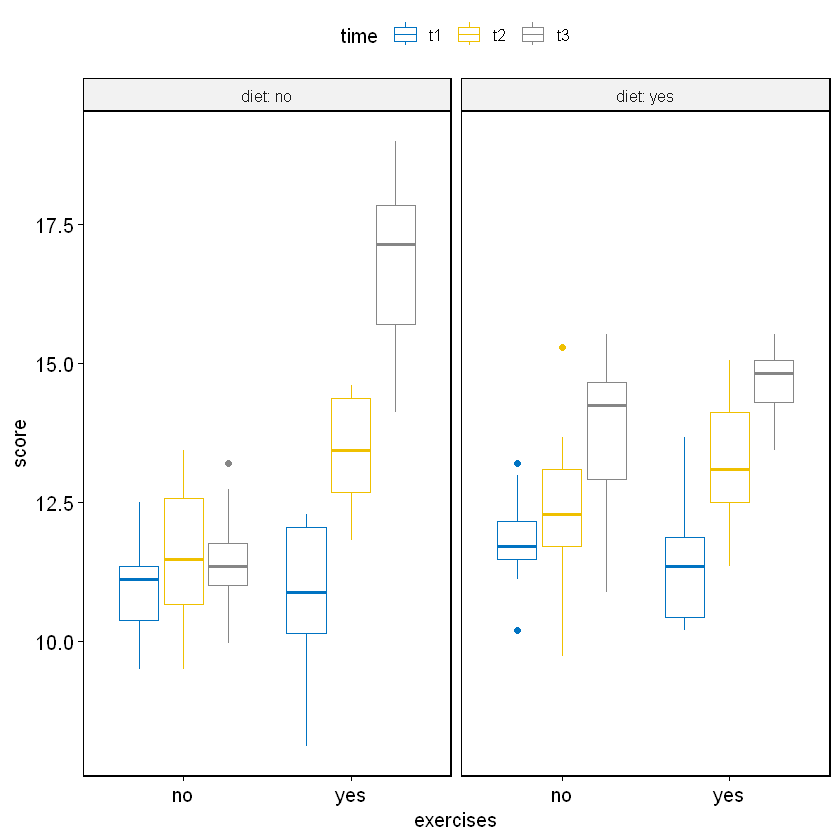

In [49]:
ggboxplot(
  weightloss, x = "exercises", y = "score",
  color = "time", palette = "jco",
  facet.by = "diet", short.panel.labs = FALSE
  )

In [50]:
#正态性
weightloss %>%
  group_by(diet, exercises, time) %>%
  shapiro_test(score)

diet,exercises,time,variable,statistic,p
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
no,no,t1,score,0.9173082,0.2643971
no,no,t2,score,0.9571979,0.7432089
no,no,t3,score,0.9649090,0.8509028
no,yes,t1,score,0.9223457,0.3059440
no,yes,t2,score,0.9123400,0.2285804
no,yes,t3,score,0.9525447,0.6744326
yes,no,t1,score,0.9422786,0.5281443
yes,no,t2,score,0.9816773,0.9894564
yes,no,t3,score,0.9313724,0.3948864


In [51]:
#方差齐性
levene_test(score ~ exercises*diet*time, data=weightloss)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
11,132,1.311458,0.2248131


In [52]:
res.aov <- anova_test(
  data = weightloss, dv = score, wid = id,
  within = c(time,diet), between =exercises
  )

Warning message:
"The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created"


In [53]:
#主效应
get_anova_table(res.aov)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,exercises,1,22,38.771,2.88e-06,*,0.284
2,time,2,44,82.199,1.38e-15,*,0.541
3,diet,1,22,7.912,1.00e-02,*,0.028
4,exercises:time,2,44,26.222,3.18e-08,*,0.274
5,exercises:diet,1,22,51.698,3.31e-07,*,0.157
6,time:diet,2,44,0.784,4.63e-01,,0.013
7,exercises:time:diet,2,44,9.966,2.69e-04,*,0.147


In [54]:
#简单效应分析
two.way <- weightloss %>%
  group_by(time) %>%
  anova_test(dv = score, wid = id, between = c(diet,exercises))
two.way

Warning message:
"The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created"
Warning message:
"The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created"
Warning message:
"The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created"


,time,Effect,DFn,DFd,F,p,p<.05,ges
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,t1,diet,1,44,5.565,2.30e-02,*,0.112
2,t1,exercises,1,44,0.584,4.49e-01,,0.013
3,t1,diet:exercises,1,44,0.149,7.02e-01,,0.003
4,t2,diet,1,44,0.828,3.68e-01,,0.018
5,t2,exercises,1,44,13.736,5.85e-04,*,0.238
6,t2,diet:exercises,1,44,2.117,1.53e-01,,0.046
7,t3,diet,1,44,0.064,8.01e-01,,0.001
8,t3,exercises,1,44,82.493,1.19e-11,*,0.652
9,t3,diet:exercises,1,44,42.943,5.18e-08,*,0.494


In [55]:
#两两比较
weightloss %>%
  group_by(time,exercises) %>%
  pairwise_t_test(score ~ diet)


,exercises,time,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,no,t1,score,no,yes,12,12,0.034200,*,0.034200,*
2,yes,t1,score,no,yes,12,12,0.227000,ns,0.227000,ns
3,no,t2,score,no,yes,12,12,0.140000,ns,0.140000,ns
4,yes,t2,score,no,yes,12,12,0.672000,ns,0.672000,ns
5,no,t3,score,no,yes,12,12,0.000101,***,0.000101,***
6,yes,t3,score,no,yes,12,12,0.000164,***,0.000164,***
